<a href="https://colab.research.google.com/github/Deep-of-Machine/Fan_recognition/blob/main/%EC%84%A0%ED%92%8D%EA%B8%B0_%EC%82%AC%EB%9E%8C%EB%93%A4%EC%9D%98_%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,타임스탬프,집에서 사용하는 선풍기 날개 엽의 개수,바람의 세기가 가장 강할것 같은 날개 엽의 개수,소음이 가장 적을것 같은 선풍기 날개 엽의 개수
0,2019. 8. 31 오전 11:03:05,"3개, 5개",3개,2개
1,2019. 8. 31 오후 8:17:44,3개,3개,5개
2,2019. 8. 31 오후 11:32:35,4개,3개,3개
3,2019. 8. 31 오후 11:36:58,"3개, 5개",5개,2개
4,2019. 9. 1 오전 12:05:54,"3개, 4개",4개,5개
5,2019. 9. 1 오전 12:20:17,3개,3개,3개
6,2019. 9. 1 오전 10:36:30,"3개, 5개",3개,2개
7,2019. 9. 1 오전 11:05:11,"4개, 5개",4개,5개
8,2019. 9. 1 오전 11:25:08,5개,5개,3개
9,2019. 9. 1 오후 11:03:16,4개,3개,3개


0     [3개,  5개]
1          [3개]
2          [4개]
3     [3개,  5개]
4     [3개,  4개]
5          [3개]
6     [3개,  5개]
7     [4개,  5개]
8          [5개]
9          [4개]
10         [5개]
11         [3개]
12         [3개]
Name: 집에서 사용하는 선풍기 날개 엽의 개수, dtype: object

0     3개
1     3개
2     3개
5     3개
6     3개
9     3개
11    3개
4     4개
7     4개
3     5개
8     5개
10    5개
12    5개
Name: 바람의 세기가 가장 강할것 같은 날개 엽의 개수, dtype: object

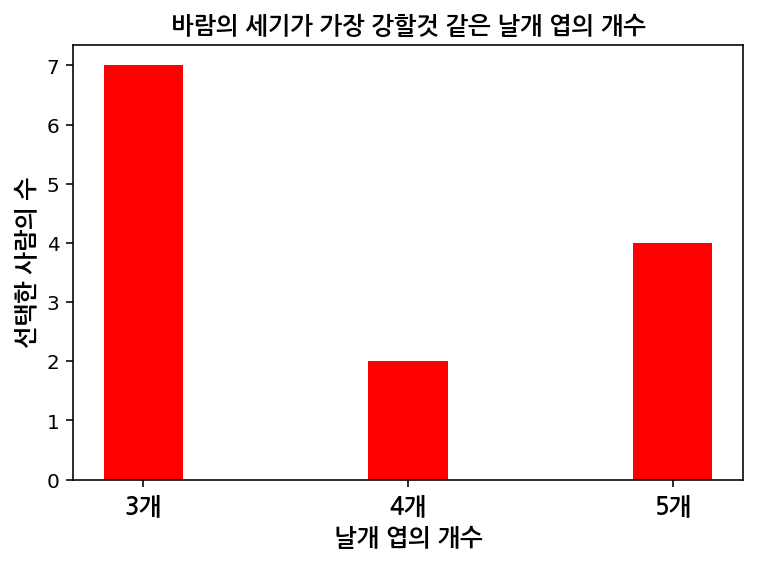

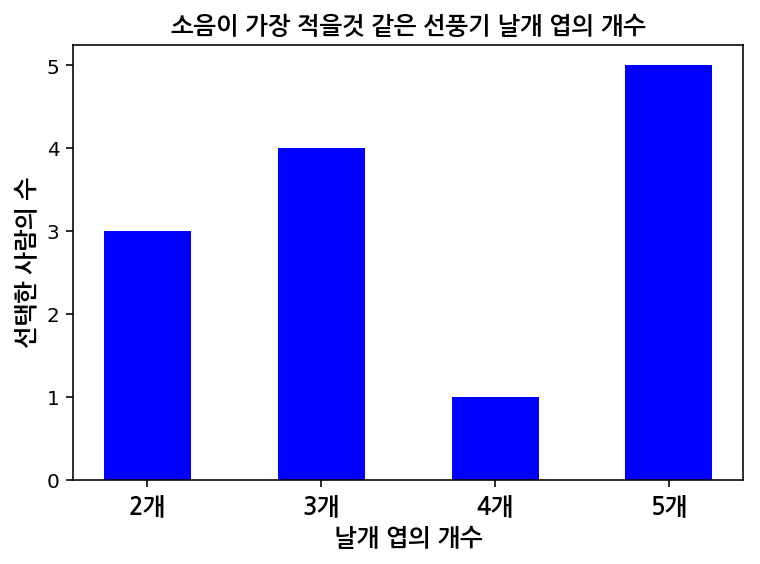

"\ndf0= df[df['성별'] == '남성']\ndf1= df[df['성별'] == '여성']\nplt.scatter(df0['몸무게'].astype(int), df0['키'].astype(int), s=15, c='b', label='Men')\nplt.scatter(df1['몸무게'].astype(int), df1['키'].astype(int), s=15, c='r', label='Women')\nplt.legend()\nplt.title('BMI')\nplt.xlabel('Weight')\nplt.ylabel('Height')\nplt.show()\n\nplt.figure(figsize=(10, 7))\nhist = collections.Counter(df['bmi'].astype(float))\nind = np.arange(len(hist))\nplt.bar(ind, hist.keys(), width=0.5, color ='blue')\nplt.xticks(ind, df['이름'],fontproperties=fontprop)\nplt.title('BMI')\nplt.xlabel('Name')\nplt.ylabel('BMI')\nplt.show()\n\nplt.figure(figsize=(10, 7))\nhist = collections.Counter(df['판정'])\nind = np.arange(len(hist))\nplt.bar(ind, hist.values(), width=0.5, color ='red')\nplt.xticks(ind, hist.keys(), fontproperties=fontprop)\nplt.title('BMI')\nplt.xlabel('Category')\nplt.ylabel('People')\nplt.show()\n"

In [ ]:
'''
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
'''

%matplotlib inline
%config InlineBackend.figure_format='retina'
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=path, size=12)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

from google.colab import auth
auth.authenticate_user()   # 사용자 인증
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())  # 스프레드시트 사용 권한을 gc에 저장
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IKOzCkF7T_XK6iXj70BYJprxHEMmp4qXRIxX666NgkU/edit#gid=216037538').sheet1  # 스프레드시트를 오픈
rows = worksheet.get_all_values()  # 스프레드시트를 읽음(모든 셀의 값을 문자열 형식의 리스트의 리스트를 반환)
df = pd.DataFrame.from_records(rows[1:], columns=rows[0])


display(df)
df1 = df['집에서 사용하는 선풍기 날개 엽의 개수'].str.split(',')
df2=[]
df3=[]

display(df1)

#df1 = df1.str.rstrip('개').astype(int)
df2 = df['바람의 세기가 가장 강할것 같은 날개 엽의 개수'].sort_values()#.str.rstrip('개').astype(int)
df3 = df['소음이 가장 적을것 같은 선풍기 날개 엽의 개수'].sort_values()#.str.rstrip('개').astype(int)
display(df2)

plt.title('바람의 세기가 가장 강할것 같은 날개 엽의 개수',fontproperties=fontprop)
hist = collections.Counter(df2)
ind = np.arange(len(hist))
plt.bar(ind, hist.values(), width=0.3, color='red')
plt.xticks(ind, hist.keys(), fontproperties=fontprop)
plt.xlabel('날개 엽의 개수', fontproperties=fontprop)
plt.ylabel('선택한 사람의 수', fontproperties=fontprop)
plt.show()


plt.title('소음이 가장 적을것 같은 선풍기 날개 엽의 개수',fontproperties=fontprop)
hist = collections.Counter(df3)
ind = np.arange(len(hist))
plt.bar(ind, hist.values(), width=0.5, color='blue')
plt.xticks(ind, hist.keys(), fontproperties=fontprop)
plt.xlabel('날개 엽의 개수', fontproperties=fontprop)
plt.ylabel('선택한 사람의 수', fontproperties=fontprop)
plt.show()

'''
df0= df[df['성별'] == '남성']
df1= df[df['성별'] == '여성']
plt.scatter(df0['몸무게'].astype(int), df0['키'].astype(int), s=15, c='b', label='Men')
plt.scatter(df1['몸무게'].astype(int), df1['키'].astype(int), s=15, c='r', label='Women')
plt.legend()
plt.title('BMI')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

plt.figure(figsize=(10, 7))
hist = collections.Counter(df['bmi'].astype(float))
ind = np.arange(len(hist))
plt.bar(ind, hist.keys(), width=0.5, color ='blue')
plt.xticks(ind, df['이름'],fontproperties=fontprop)
plt.title('BMI')
plt.xlabel('Name')
plt.ylabel('BMI')
plt.show()

plt.figure(figsize=(10, 7))
hist = collections.Counter(df['판정'])
ind = np.arange(len(hist))
plt.bar(ind, hist.values(), width=0.5, color ='red')
plt.xticks(ind, hist.keys(), fontproperties=fontprop)
plt.title('BMI')
plt.xlabel('Category')
plt.ylabel('People')
plt.show()
'''
